In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from statistics import mean
from scipy import stats

from numpy import mean
from numpy import std
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

def column(matrix, i):
    return [row[i] for row in matrix]

def generate_graph_RandomForestClassifier(executions):
  list_colors = ['black', 'red', 'blue', 'yellow', 'green', 'magenta', 'cyan']
  list_labels = ['5 trees', '10 trees', '30 trees', '50 trees', '100 trees', '500 trees', '1000 trees']
  fig = plt.figure()
  ax = plt.axes()
  plt.xticks(rotation=45)
  plt.xlabel('Número de Repetições')
  plt.ylabel('Acurácia (%)')
  for i in range(0, len(executions)):
    ax.plot(column(executions[i],0), column(executions[i],1), '-ok', label=list_labels[i], linewidth=2, color=list_colors[i])
  
  ax.legend()

def generate_graph_KNeighborsClassifier(executions):
  fig = plt.figure()
  ax = plt.axes()
  plt.xticks(rotation=45)
  plt.xlabel('Número de K')
  plt.ylabel('Acurácia (%)')
  ax.plot(column(executions,0), column(executions,1), '-ok', label='line 1', linewidth=2)



In [2]:
cols = ['erythema', 
        'scaling', 
        'definite borders', 
        'itching', 
        'koebner phenomenon', 
        'polygonal papules', 
        'follicular papules', 
        'oral mucosal involvement', 
        'knee and elbow involvement', 
        'scalp involvement', 
        'family history',
        'melanin incontinence', 
        'eosinophils in the infiltrate', 
        'PNL infiltrate', 
        'ibrosis of the papillary dermis', 
        'exocytosis', 
        'acanthosis', 
        'hyperkeratosis', 
        'parakeratosis', 
        'clubbing of the rete ridges', 
        'elongation of the rete ridges', 
        'thinning of the suprapapillary epidermis', 
        'spongiform pustule', 
        'munro microabcess', 
        'focal hypergranulosis',
        'disappearance of the granular layer', 
        'vacuolisation and damage of basal layer', 
        'spongiosis',
        'saw-tooth appearance of retes',
        'follicular horn plug',
        'perifollicular parakeratosis',
        'inflammatory monoluclear inflitrate',
        'band-like infiltrate',
        'age',
        'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data', names=cols, na_values='?')
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,ibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [4]:
print("shape of dataframe", df.shape)
df['class'].value_counts()

shape of dataframe (366, 35)


1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

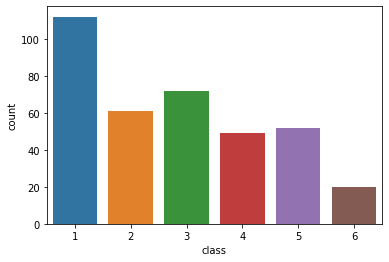

In [5]:
ax = sns.countplot(x="class", data=df)

In [6]:
#exibindo os dados faltantes
n_miss = df[['age']].isnull().sum()
perc = n_miss / df.shape[0] * 100
print('Missing: %d (%.2f%%)' % (n_miss, perc))
df[df['age'].isna()]

Missing: 8 (2.19%)


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,ibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,NaN,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,NaN,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,NaN,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,NaN,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,NaN,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,NaN,5


In [3]:
#exclusão dos dados faltantes
df.dropna(inplace = True)
n_miss = df[['age']].isnull().sum()
perc = n_miss / df.shape[0] * 100
print('Missing: %d (%.2f%%)' % (n_miss, perc))
print("shape of dataframe", df.shape)
df['class'].value_counts()

Missing: 0 (0.00%)
shape of dataframe (358, 35)


1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

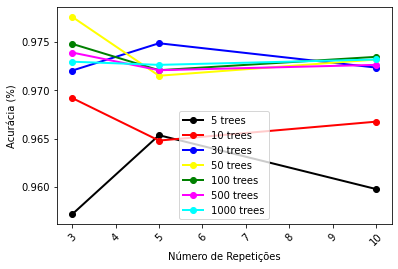

In [7]:
#criaçao do modelo e valdacao
X = df.iloc[:, 0:34]
y = df[['class']] 
number_of_trees = [5, 10, 30, 50, 100, 500, 1000]
number_of_repeats = [3, 5, 10]
executions = []

for i in number_of_trees:
  model = RandomForestClassifier(n_estimators=i, class_weight='balanced_subsample')
  points_accuracy = []
  
  for j in number_of_repeats:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=j, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    points_accuracy.append([j, mean(n_scores)])
  executions.append(points_accuracy)

generate_graph_RandomForestClassifier(executions)

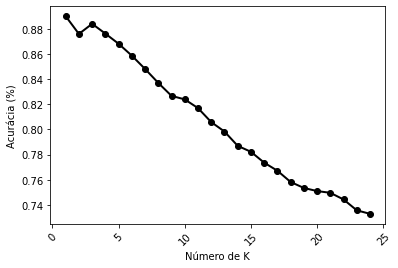

In [8]:
#método não-paramétrico e validacao
X = df.iloc[:, 0:34]
y = df[['class']]
executions = []

for i in range(1,25):
  model = KNeighborsClassifier(n_neighbors=i)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
  n_scores = cross_val_score(model, X, np.ravel(y), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  executions.append([i, mean(n_scores)])

generate_graph_KNeighborsClassifier(executions)

In [8]:
cols = ['erythema', 
        'scaling', 
        'definite borders', 
        'itching', 
        'koebner phenomenon', 
        'polygonal papules', 
        'follicular papules', 
        'oral mucosal involvement', 
        'knee and elbow involvement', 
        'scalp involvement', 
        'family history',
        'melanin incontinence', 
        'eosinophils in the infiltrate', 
        'PNL infiltrate', 
        'ibrosis of the papillary dermis', 
        'exocytosis', 
        'acanthosis', 
        'hyperkeratosis', 
        'parakeratosis', 
        'clubbing of the rete ridges', 
        'elongation of the rete ridges', 
        'thinning of the suprapapillary epidermis', 
        'spongiform pustule', 
        'munro microabcess', 
        'focal hypergranulosis',
        'disappearance of the granular layer', 
        'vacuolisation and damage of basal layer', 
        'spongiosis',
        'saw-tooth appearance of retes',
        'follicular horn plug',
        'perifollicular parakeratosis',
        'inflammatory monoluclear inflitrate',
        'band-like infiltrate',
        'age',
        'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data', names=cols, na_values='?')
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,ibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [9]:
print("shape of dataframe", df.shape)
n_miss = df[['age']].isnull().sum()
perc = n_miss / df.shape[0] * 100
print('Missing: %d (%.2f%%)' % (n_miss, perc))

shape of dataframe (366, 35)
Missing: 8 (2.19%)


In [10]:
#substituição dos valores faltantes pela média
imr = SimpleImputer(strategy='median')
imr = imr.fit(df[['age']])
df['age'] = imr.transform(df[['age']]).ravel()
print('Missing: %d' % df[['age']].isnull().sum())

Missing: 0


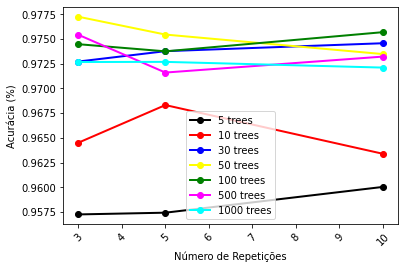

In [12]:
#criaçao do modelo e valdacao
X = df.iloc[:, 0:34]
y = df[['class']] 
number_of_trees = [5, 10, 30, 50, 100, 500, 1000]
number_of_repeats = [3, 5, 10]
executions = []

for i in number_of_trees:
  model = RandomForestClassifier(n_estimators=i, class_weight='balanced_subsample')
  points_accuracy = []
  
  for j in number_of_repeats:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=j, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    points_accuracy.append([j, mean(n_scores)])
  executions.append(points_accuracy)

generate_graph_RandomForestClassifier(executions)

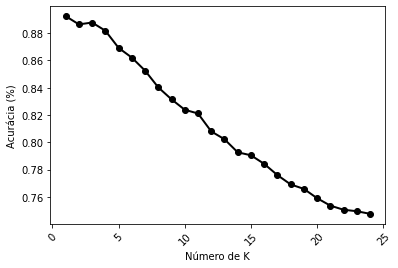

In [13]:
#método não-paramétrico e validacao
X = df.iloc[:, 0:34]
y = df[['class']]
executions = []

for i in range(1,25):
  model = KNeighborsClassifier(n_neighbors=i)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
  n_scores = cross_val_score(model, X, np.ravel(y), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  executions.append([i, mean(n_scores)])

generate_graph_KNeighborsClassifier(executions)



In [14]:
#balanceamento usando ADASYN
print('Original dataset shape %s' % y.value_counts())

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % y_res.value_counts())

Original dataset shape class
1        112
3         72
2         61
5         52
4         49
6         20
dtype: int64
Resampled dataset shape class
4        121
6        113
3        112
1        112
5        110
2        104
dtype: int64


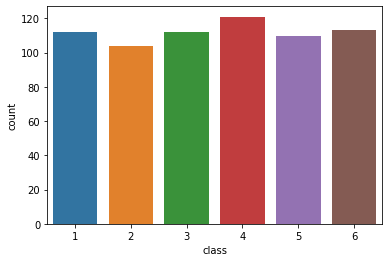

In [15]:
ax = sns.countplot(x="class", data=y_res)

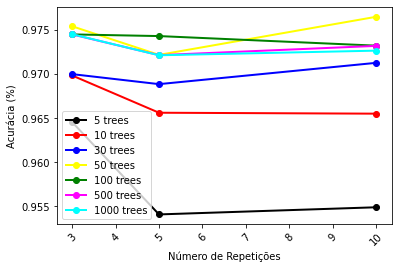

In [16]:
#criaçao do modelo e valdacao
#fazer uma variação com o número de árvores
#criaçao do modelo e valdacao
X_res = df.iloc[:, 0:34]
y_res = df[['class']] 
number_of_trees = [5, 10, 30, 50, 100, 500, 1000]
number_of_repeats = [3, 5, 10]
executions = []

for i in number_of_trees:
  model = RandomForestClassifier(n_estimators=i, class_weight='balanced_subsample')
  points_accuracy = []
  
  for j in number_of_repeats:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=j, random_state=1)
    n_scores = cross_val_score(model, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    points_accuracy.append([j, mean(n_scores)])
  executions.append(points_accuracy)

generate_graph_RandomForestClassifier(executions)

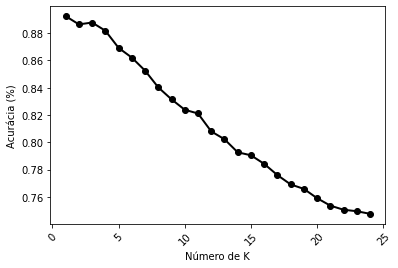

In [17]:
#método não-paramétrico e validacao
X_res = df.iloc[:, 0:34]
y_res = df[['class']] 
executions = []

for i in range(1,25):
  model = KNeighborsClassifier(n_neighbors=i)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
  n_scores = cross_val_score(model, X_res, np.ravel(y_res), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  executions.append([i, mean(n_scores)])

generate_graph_KNeighborsClassifier(executions)

In [4]:
def get_initial_points(data, k):
    n = len(data)
    means = []
    while len(means) != k:
        row = data.iloc[randrange(n)].to_list()
        if row not in means:
            means.append(row)
    return means

def squared_euclidean_distance(a, b):
    n = len(a)
    assert(n == len(b))
    return sum([(a[i] - b[i])**2 for i in range(n)])


def k_means(data, k):
    # Obter pontos (centroides) iniciais:
    means = get_initial_points(data, k)
    change = True
    result = False
    new_result = False
    while change:
        new_result = {}
        for i in range(k):
            new_result[i] = []
        # Atribuir conjuntos de pontos aos clusters:
        for _, x in data.iterrows():
            point = x.to_list()
            smallest_dist = float("inf")
            cluster = None
            for i in range(k):
                sed = squared_euclidean_distance(point, means[i])
                if sed < smallest_dist:
                    smallest_dist = sed
                    cluster = i
            # Atribuir o ponto ao cluster mais próximo]:
            new_result[cluster].append(point)
        # 
        # Atualizar os centroides:
        new_means = []
        for i in range(k):
            new_means.append([float(sum(col))/len(col) for col in zip(*new_result[i])])
        # Critérios de parada
        if result:
            change = False
            for i in range(k):
                if sorted(result[i]) != sorted(new_result[i]):
                    change = True
        #print(f"Change: {change}") #visualiza quantas iterações (true) faz, até converger false
        # Atualização das variáveis:
        result = new_result
        means = new_means
    return result

def get_dissimilar_partitions(data, k):
    # Criar os conjuntos iniciais:
    initial_points = get_initial_points(data, k)
    result = {}
    for i in range(k):
        result[i] = [initial_points[i]]
    
    # Obter todos os outros pontos:
    all_points = []
    for _, x in data.iterrows():
        point = x.to_list()
        if point not in initial_points:
            all_points.append(point)
    
    # Atribuir os pontos:
    i = 0 # Quem começa é o primeiro conjunto
    while all_points:
        point_set = result[i]
        max_dist = 0
        point_to_add = None
        for x in all_points:
            min_dist_x = float("inf")
            for y in point_set:
                dist_x_y = squared_euclidean_distance(x, y)
                if dist_x_y < min_dist_x:
                    min_dist_x = dist_x_y
            if min_dist_x > max_dist:
                max_dist = min_dist_x
                point_to_add = x
        result[i].append(point_to_add)
        all_points.remove(point_to_add)
        i = (i + 1) % k
    
    return result

>5 0.917 (0.094)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


>10 0.904 (0.087)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


>30 0.875 (0.089)
>50 0.975 (0.029)
>100 0.976 (0.047)


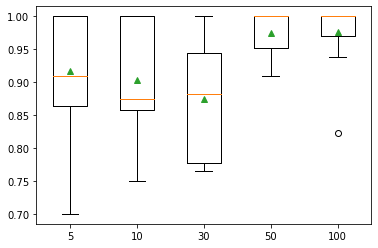

In [19]:
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

def get_models():
	models = dict()
	number_of_trees = [5, 10, 30, 50, 100]
	for n in number_of_trees:
		models[str(n)] = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n)
	return models

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


def get_DataFrame(i, similar_points):	
	cluster = similar_points.get(i)
	cluster_df = pd.DataFrame(cluster, columns=cols) 
	return cluster_df


models = get_models()
results, names = list(), list()
i=0

similar_points = k_means(df[cols], 5)

for name, model in models.items():
	k_means_df = get_DataFrame(i, similar_points)
	X = k_means_df.iloc[:, 0:34]
	y = k_means_df[['class']]
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name) 
	i+=1
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


>5 0.860 (0.067)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


>10 0.909 (0.059)
>30 0.941 (0.064)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


>50 0.910 (0.058)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


>100 0.954 (0.041)


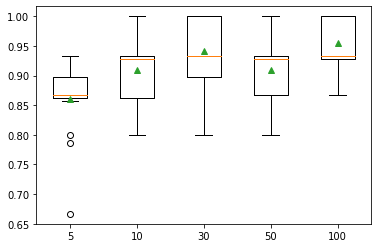

In [20]:
models = get_models()
results, names = list(), list()
i=0

dissimilar_points = get_dissimilar_partitions(df[cols], 5)

for name, model in models.items():
	dissimilar_points_df = get_DataFrame(i, dissimilar_points)
	X = dissimilar_points_df.iloc[:, 0:34]
	y = dissimilar_points_df[['class']]
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name) 
	i+=1
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:
class BaggingModel:
    """Implementation of bagging ensemble"""
    
    def __init__(self):
        self.list_trees = []
    
    def train_bagging_model(self, data, cols, metodo_de_particao, number_of_trees=5):
        data = data.dropna().reset_index(drop=True)
        self.list_trees = []
        data_indexed = data.set_index(cols[:-1])
        groups_of_similar_points = metodo_de_particao(data[cols[:-1]], number_of_trees)
        for j in range (0, number_of_trees):
            # Crear as X a partir de um grupo de observações:
            X = pd.DataFrame(data=groups_of_similar_points[j], columns=cols[:-1])
            # Obter as classes (y) correspondentes a essas observações:
            y = data_indexed[data_indexed.index.isin(groups_of_similar_points[j])].reset_index(drop=True)
            # Treinar o modelo e guardar o resultado em uma lista
            self.list_trees.append(tree.DecisionTreeClassifier().fit(X.values, y))
    
    def predict(self, x_new):
        # Votar:
        votes = []
        for tree in self.list_trees:
            #print(x_new)
            votes.append(tree.predict([x_new])[0])
        #print(f"Votes: {votes}")
        return int(stats.find_repeats(votes)[0][0])

In [6]:
# Treinando e testando bagging caso partições semelhantes
model = BaggingModel()
model.train_bagging_model(df, cols, k_means, number_of_trees=5)

In [7]:
# Treinando e testando bagging caso partições diferentes
model = BaggingModel()
model.train_bagging_model(df, cols, get_dissimilar_partitions, number_of_trees=5)

In [8]:
# Validaçõ cruzada
def cross_validation(data, cols, metodo_de_particao, validation_ratio, ntrees=5, nsplits=5):
    n = len(data)
    accuracies = []
    for i in range(nsplits):
        validation = []
        validation_indexes = []
        while len(validation) < n/nsplits:
            index = randrange(n)
            row = data.iloc[index].to_list()
            if row not in validation:
                validation.append(row)
                validation_indexes.append(index)
        print(f"Tamanho do conjunto de validação: {len(validation)}")
        data_training = data[~data.index.isin(validation_indexes)].reset_index(drop=True)
        print(f"Tamanho do conjunto de treinamento: {len(data_training)}")
        
        # Treinar:
        model = BaggingModel()
        model.train_bagging_model(data_training, cols, metodo_de_particao, number_of_trees=ntrees)
        
        # Validar:
        number_successes = 0
        for x in validation:
            row = x[: (len(x) - 1)]
            #print(row)
            result = model.predict(row)
            #print(f"Input: {row}, result: {result}")
            if result == x[len(x) - 1]:
                number_successes = number_successes + 1
        accuracies.append(float(number_successes) / len(validation))
    return accuracies

Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322


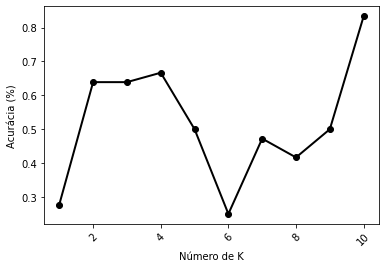

In [20]:
# Testando validação cruzada para caso de partições semelhantes
results_graph = []
i=1
results = cross_validation(df, cols, k_means, validation_ratio=0.2, ntrees=10, nsplits=10)

for result in results:
  results_graph.append([i, result])
  i +=1

generate_graph_KNeighborsClassifier(results_graph)

Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 325
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 323
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 322
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 324
Tamanho do conjunto de validação: 36
Tamanho do conjunto de treinamento: 324


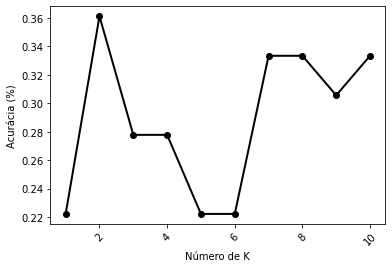

In [21]:
# Testando validação cruzada para caso de partições diferentes
results_graph = []
i=1
results = cross_validation(df, cols, get_dissimilar_partitions, validation_ratio=0.2, ntrees=10, nsplits=10)

for result in results:
  results_graph.append([i, result])
  i +=1

generate_graph_KNeighborsClassifier(results_graph)